# Task 2.1 - Gradiente Descendiente Estocástico

Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini
batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos
solicitados y la distribución real de puntos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Polinomio y derivada
# Coeficientes del polinomio 2*x**3 - 3*x**2 + 5*x + 3
coefficients = [2, -3, 5, 3]  
poly = np.poly1d(coefficients)  
derivative = np.polyder(poly) 


In [3]:
# Generar datos
x = np.linspace(-10, 10, 200)
x_normalized = (x - np.mean(x)) / np.std(x)  # Normalización
y_real = poly(x_normalized)

In [4]:
# Gradiente descendente
def gradient_descent(x, y, learning_rate=0.000001, epochs=1000):
    w = np.random.randn(4) * 0.0001 # Inicialización aleatoria de coeficientes
    n = len(x)
    for epoch in range(epochs):
        y_pred = np.polyval(w, x)
        grad = -2/n * np.sum((y - y_pred)[:, None] * np.array([x**3, x**2, x, np.ones_like(x)]).T, axis=0)
        grad = np.clip(grad, -10, 10)  # Limitar gradientes
        w -= learning_rate * grad
    return w

In [28]:
# Gradiente descendente estocástico
def stochastic_gradient_descent(x, y, learning_rate=0.000001, epochs=1000):
    w = np.random.randn(4) * 0.0001 # Inicialización aleatoria de coeficientes
    n = len(x)
    for epoch in range(epochs):
        for i in range(n):
            y_pred = np.polyval(w, x[i])
            grad = -2 * (y[i] - y_pred) * np.array([x[i]**3, x[i]**2, x[i], 1])
            grad = np.clip(grad, -10, 10)  # Limitar gradientes
            w -= learning_rate * grad
    return w

In [6]:
# Gradiente descendente por mini batches
def mini_batch_gradient_descent(x, y, batch_size=10, learning_rate=0.000001, epochs=1000):
    w = np.random.randn(4) * 0.0001 # Inicialización aleatoria de coeficientes
    n = len(x)
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        for i in range(0, n, batch_size):
            batch_indices = indices[i:i+batch_size]
            x_batch = x[batch_indices]
            y_batch = y[batch_indices]
            y_pred = np.polyval(w, x_batch)
            grad = -2/len(x_batch) * np.sum((y_batch - y_pred)[:, None] * np.array([x_batch**3, x_batch**2, x_batch, np.ones_like(x_batch)]).T, axis=0)
            grad = np.clip(grad, -10, 10)  # Limitar gradientes
            w -= learning_rate * grad
    return w

In [29]:
# Comparar métodos y toma de tiempo de cada uno
start = time.time()
w_gd = gradient_descent(x, y_real)
time_gd = time.time() - start

start = time.time()
w_sgd = stochastic_gradient_descent(x, y_real)
time_sgd = time.time() - start

start = time.time()
w_mbgd = mini_batch_gradient_descent(x, y_real)
time_mbgd = time.time() - start

In [30]:
# Evaluar fitness (Error cuadrático medio)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [31]:
y_gd = np.polyval(w_gd, x)
y_sgd = np.polyval(w_sgd, x)
y_mbgd = np.polyval(w_mbgd, x)

error_gd = mse(y_real, y_gd)
error_sgd = mse(y_real, y_sgd)
error_mbgd = mse(y_real, y_mbgd)

In [32]:
# Resultados
print(f"Gradiente Descendente: Tiempo = {time_gd:.4f}s, Error cuadrático medio = {error_gd:.4f}")
print(f"Gradiente Descendente Estocástico: Tiempo = {time_sgd:.4f}s, Error cuadrático medio  = {error_sgd:.4f}")
print(f"Gradiente Descendente Mini Batch: Tiempo = {time_mbgd:.4f}s, Error cuadrático medio  = {error_mbgd:.4f}")


Gradiente Descendente: Tiempo = 0.0685s, Error cuadrático medio = 31.2947
Gradiente Descendente Estocástico: Tiempo = 4.9428s, Error cuadrático medio  = 35.6419
Gradiente Descendente Mini Batch: Tiempo = 0.9674s, Error cuadrático medio  = 7.0429


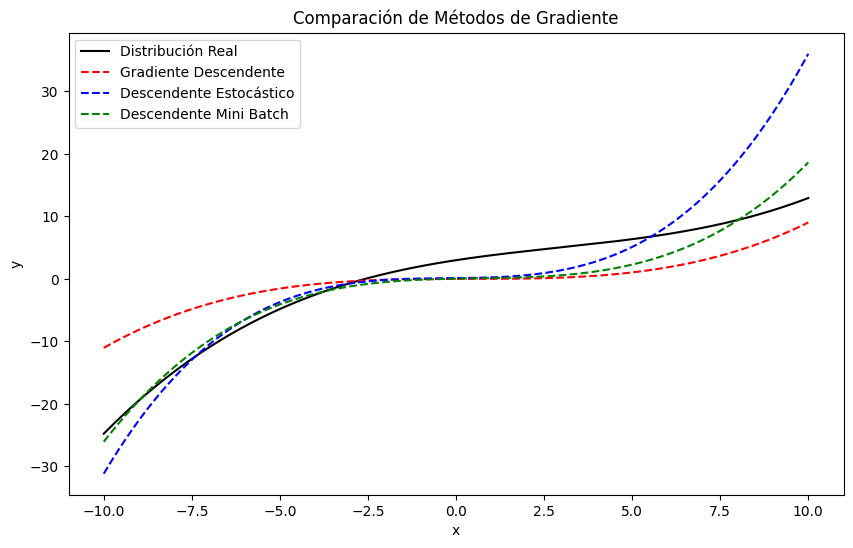

In [33]:
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(x, y_real, label='Distribución Real', color='black')
plt.plot(x, y_gd, label='Gradiente Descendente', linestyle='--', color='red')
plt.plot(x, y_sgd, label='Descendente Estocástico', linestyle='--', color='blue')
plt.plot(x, y_mbgd, label='Descendente Mini Batch', linestyle='--', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de Métodos de Gradiente')
plt.show()

# **Respuestas del task 2.1**

## Compare el tiempo de ejecución de cada uno de los métodos solicitados. De esto, mencione cuál método fue más rápido y por qué.

R// El que se toma menor tiempo es el gradiente descendiente, el que tuvo mayor tiempo fue el gradiente descentdiente estocástico. El estocástico al tener una complejidad de cómputo mayor y dos for loops dentro de su cálculo tiene sentido que sea el que se tarde más que los otros dos métodos.


## Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). De esto mencione cuál método lo hizo mejor y por qué

R// El método que tuvo un menor error fue el gradiente descendiente por mini-batch, al ser como una combinación de ambos no necesitó tanta carga computacional para obtener un menor varianza y ajustarse mejor a los datos 'reales' del polinomio.